# Project 2: Fine Tuning TrOCR on Curve Text

#### Maximum Points: 100

This project evaluates your understanding and implementation of OCR on curved texts. The overall project is divided into several sections, with specific marks assigned to each.


**Mark Distribution**:

<div align = "center">
    <table>
        <tr><td><h3>No.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1.1.</h3></td> <td><h3> Visualize Dataset </h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>1.2</h3></td> <td><h3> Dataset Class </h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>2.0</h3></td> <td><h3> Model </h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>3.0</h3></td> <td><h3> Training </h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>4.0</h3></td> <td><h3> Inference</h3></td> <td><h3>5</h3></td> </tr>
    </table>
        
</div>

---

Breakdown of marks based on CER metric score on Validation Dataset **(50 Points)**:

The CER Score section evaluates the quality of your OCR model. Points are awarded based on the achieved CER (Character Error Rate) score on the test dataset, as shown below:

<div align="center">
    <table>
        <tr><td><h3>No.</h3></td> <td><h3>CER Score Range</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1.</h3></td> <td><h3>CER =< 43%</h3></td><td><h3>50</h3></td> </tr>
        <tr><td><h3>2.</h3></td> <td><h3>43%< CER =< 45%</h3></td> <td><h3>40</h3></td> </tr>
        <tr><td><h3>3.</h3></td> <td><h3>45%< CER =< 47%</h3></td> <td><h3>30</h3></td> </tr>
    </table>
</div>


---
<h2 style = "color: green;">Dataset Description </h2>

The SCUT-CTW1500 dataset contains 6052 training samples and 1651 test samples. The label for each image is present in a text file with a new line separation.

Let's have a look at few sample images from the dataset:

<img src = "image_OCR" width = "500" height = "500">

The dataset is structured as follows:

```python
scut_data/
├── scut_train
├── scut_test
├── scut_train.txt
└── scut_test.txt
```
Inside the text file a mapping is given:-
<ul>
    <li>006052.jpg  ty Starts with Education</li>
    <li>006053.jpg  Cardi's</li>
    <li>006054.jpg  YOU THE BUSINESS SIDE OF GREEN</li>
    <li>006055.jpg  hat is</li>
</ul>

Similarly all the images have their corresponding texts.

---

**The notebook is divided into multiple grading sections. You have to write code, as mentioned for each section.  For other helper functions, you can write `.py` files and import them in the notebook. You have to submit the notebook along with `.py` files. Your submitted code must be runnable without any bug.**

<h2 style = "color: green;">1. Data Exploration </h2>

In this section, you have to write your custom dataset class and visualize few images. If you think data augmentation is required, you can create a transformation function as well.

<h3 style = "color: green;">1.1. Visualize dataset [5 Points]</h3>


**In this sub-section,  you have to plot a few images with their text labels similar to one shown above.**

<h3 style = "color: green;">1.2. Dataset Class [15 Points]</h3>

**In this sub-section, write your custom dataset class.**

**For example:**

```python
class CustomOCRDataset(Dataset):
    """ Generic Dataset class for OCR.

        Arguments:
           root path of images = root_dir,
           processor (wraps Image processor and Text processor into single instance),
           max_target_length,
           augmentations (if present)
    """
```

<b>To download the dataset you can run the below cells.</b>

In [ ]:
import os
#import zipfile
#import requests

In [ ]:
def download_and_unzip(url, save_path):

    print("Downloading and extracting assets...", end="")
    file = requests.get(url)
    open(save_path, "wb").write(file.content)

    try:
        with zipfile.ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0]) # Unzip where downloaded.
            print("Done")
    except:
        print("Invalid file")

In [ ]:
URL = r"https://www.dropbox.com/scl/fi/vyvr7jbdvu8o174mbqgde/scut_data.zip?rlkey=fs8axkpxunwu6if9a2su71kxs&dl=1"

dataset_name = "SCUT_DATA"
dataset_zip_path = os.path.join(os.getcwd(), f"{dataset_name}.zip")
dataset_path = os.path.join(os.getcwd(), dataset_name)

# Download if dataset does not exists.
if not os.path.exists(dataset_path):
   download_and_unzip(URL, dataset_zip_path)

## Custum dataset + visualisation
 I made a helps function that store to src folder

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [12]:
from torch.utils.data import DataLoader
from src import SCUTDataset
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt
import torch 

In [3]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')

In [4]:
train_dataset = SCUTDataset(
    root_dir="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_train/",     # adapte ton chemin
    ann_path="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_train.txt",
    processor= processor,
    train_transforms =  None
)

valid_dataset = SCUTDataset(
    root_dir="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_test/",     # adapte ton chemin
    ann_path="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_test.txt",
    processor= processor,
    train_transforms = None
)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(valid_dataset))

Number of training examples: 6052
Number of validation examples: 1651


In [10]:
train_dataloader = DataLoader(
    train_dataset, batch_size=16, shuffle=True
)
valid_dataloader = DataLoader(
    valid_dataset, batch_size=16
)

batch = next(iter(train_dataloader)) 

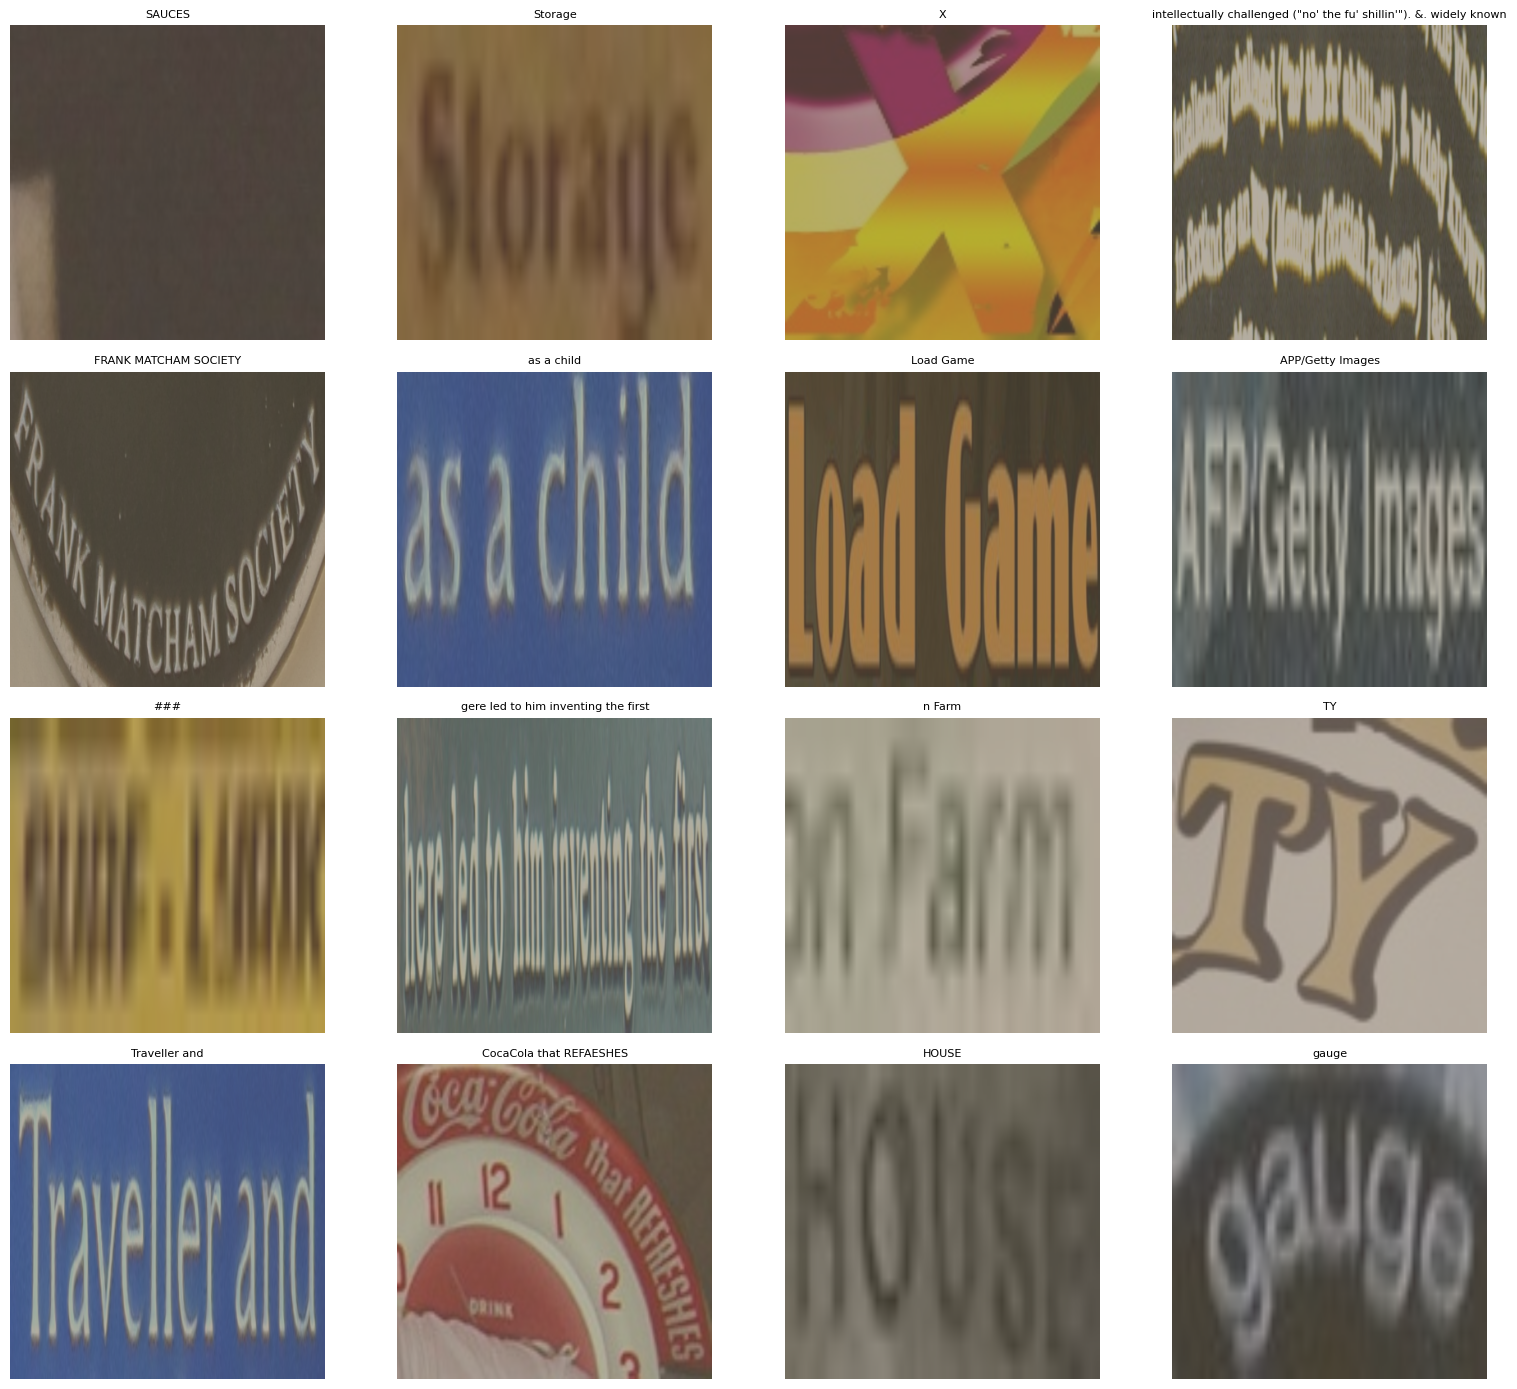

In [11]:
fig = plt.figure(figsize=(16, 14))
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

for i in range(16):
    # Images decode
    image = batch["pixel_values"][i].permute(1,2,0).numpy()
    image = image * std + mean
    image = image.clip(0, 1)

    # Label decode
    label_ids = batch["labels"][i]
    label_ids = label_ids[label_ids != -100]
    text = processor.tokenizer.decode(label_ids, skip_special_tokens=True)

    # Plot the label plus images
    plt.subplot(4,4,i+1)
    plt.title(text, fontsize=8)
    plt.imshow(image)
    plt.axis('off')


plt.tight_layout()
plt.show()

In [16]:
tt = -12
if torch.abs(torch.tensor(tt)) > 2:
    print("fcggj")

fcggj


<h2 style = "color: green;">2. Model [20 Points]</h2>

**In this section, you need to define your model, which involves specifying the model configurations and initializing the model instance.**



#### 2.1 Evaluation Metric Definition


**CER Evaluation metric can be used. Creating a function which computes CER might be helful.**


<h2 style = "color: green;">3. Training [5 points]</h2>

- **In this section, you have to train the model and infer on sample data.**

- **You can write your trainer config containing the arguments in this section.**
- **For reference, the configuration block may look like this:**
```python
    training_args = Seq2SeqTrainingArguments(
        predict_with_generate=True,
        evaluation_strategy='epoch',
        per_device_train_batch_size=TrainingConfig.BATCH_SIZE,
        per_device_eval_batch_size=TrainingConfig.BATCH_SIZE,
        fp16=True,
        output_dir='seq2seq_basemodel_printed/',
        logging_strategy='epoch',
        save_strategy='epoch',
        save_total_limit=1,
        report_to='tensorboard',
        num_train_epochs=TrainingConfig.EPOCHS,
        dataloader_num_workers=8,
        lr_scheduler_type='constant'
    )
```

- **If you are using any loss function other than PyTorch standard loss function, you have to define in this section.**


- **This section should also have optimizer and LR-schedular (if using) details.**

<h2 style = "color: green;">4. Inference [5 Points]</h2>

**Plot a few samples with the test image and predicted texts alongside.**

**For example:**

---

<img src='https://www.dropbox.com/scl/fi/hu6xw5wze8yolqcigff0e/trocr-fine-tuning-inference-result-2.png?rlkey=byqyeno4dv9if54s20scw62l2&st=z7q4rqy4&dl=1'>

<img src = "https://www.dropbox.com/scl/fi/zs1k5ttr55k1oztkb17ht/trocr-fine-tuning-inference-result-3.webp?rlkey=08jj771wc925fum4ri1d63s1s&st=v19aknp5&dl=1">

---



<h2 style="color: green;">5. CER Metric Score <span style="font-weight: normal;">[50 POINTS]</span></h2>
